In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
data = pd.read_csv('classification.csv')

In [4]:
data

,actual,predicted
0,0,0.305904
1,0,0.578251
2,0,0.156959
3,0,0.742309
4,0,0.239494
...,...,...
619,1,0.999947
620,1,0.999983
621,1,0.999966
622,1,0.999922


In [5]:
y_true = data['actual'].values
y_pred = data['predicted'].values

In [6]:
roc_curve(y_true, y_pred)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0042735 , 0.0042735 ,
        0.00854701, 0.00854701, 0.01282051, 0.01282051, 0.02136752,
        0.02136752, 0.02564103, 0.02564103, 0.02564103, 0.02991453,
        0.02991453, 0.03418803, 0.03418803, 0.03846154, 0.03846154,
        0.04273504, 0.04273504, 0.05128205, 0.05128205, 0.06837607,
        0.06837607, 0.07692308, 0.07692308, 0.08119658, 0.08119658,
        0.08547009, 0.08547009, 0.08974359, 0.08974359, 0.0982906 ,
        0.0982906 , 0.1025641 , 0.1025641 , 0.10

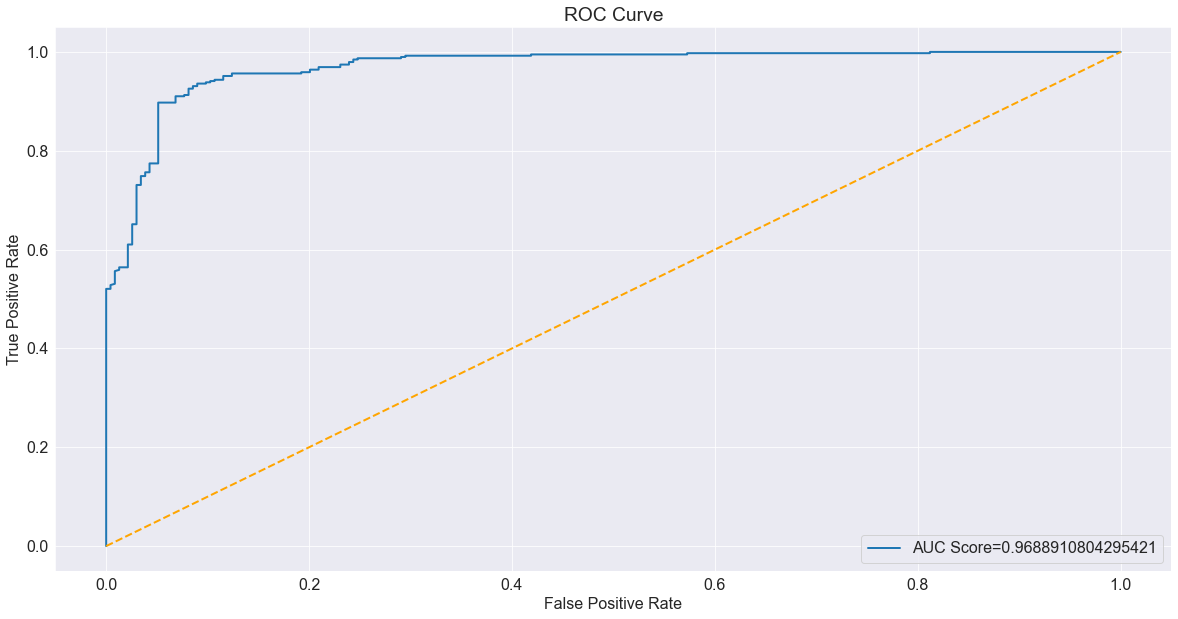

In [7]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="AUC Score="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [8]:
y_pred[y_pred>=0.6] = 1
y_pred[y_pred<0.6] = 0

In [9]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       234
           1       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



In [10]:
tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()

In [11]:
print(tn, fp, fn, tp)

159 75 3 387


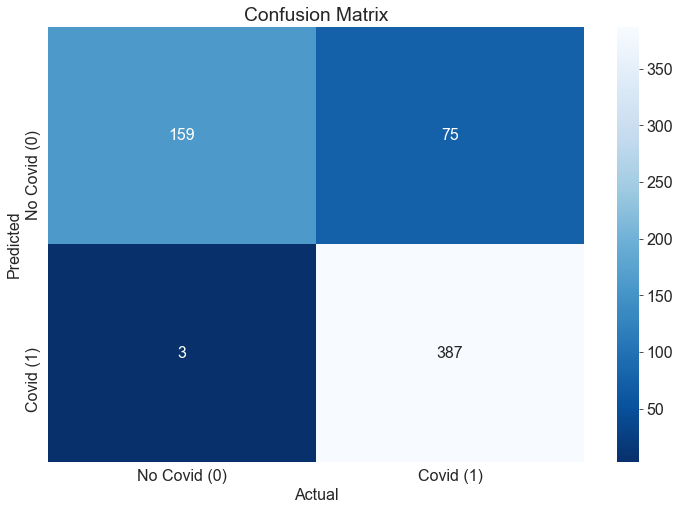

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,cmap='Blues_r',fmt='.3g',
            xticklabels=['No Covid (0)','Covid (1)'], yticklabels=['No Covid (0)','Covid (1)'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()